<a href="https://colab.research.google.com/github/alpacaYiChun/ML/blob/master/Hopfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

LEARN_SAMPLE = 4
X = 28
Y = 28
C = 3
choices = [1, -1]


11490434/11490434 [==============================] - 1s 0us/step


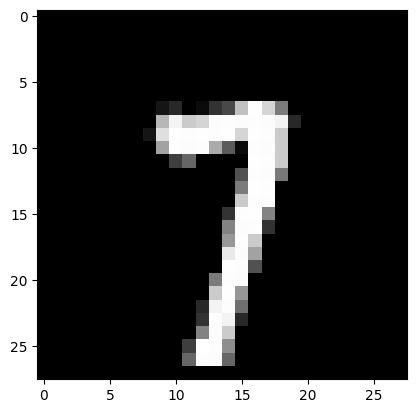

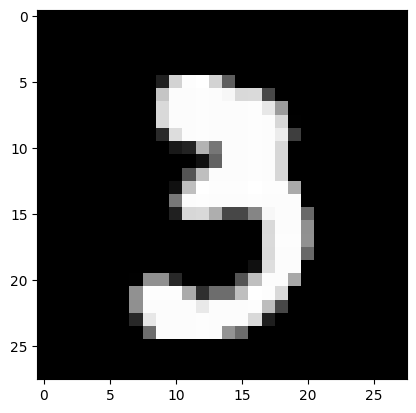

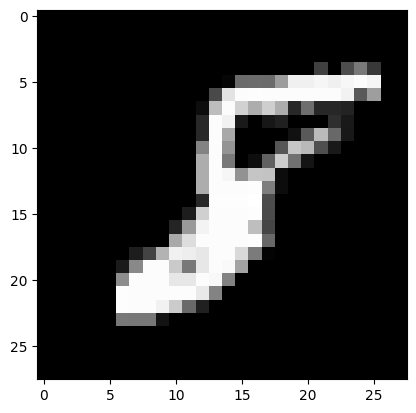

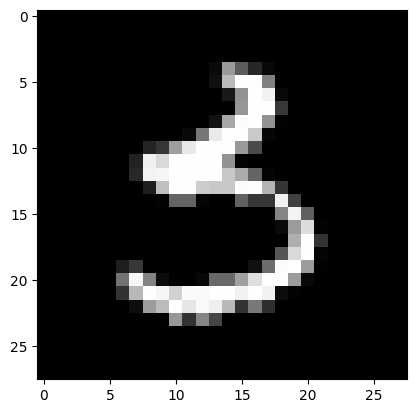

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), _ = mnist.load_data()

# Get 5 random images
random_indices = np.random.choice(len(train_images), size=LEARN_SAMPLE, replace=False)
random_images = train_images[random_indices]

# Display the images
for i in range(LEARN_SAMPLE):
  plt.imshow(random_images[i], cmap='gray')
  plt.show()

In [ ]:
print(random_images[0].shape)

(28, 28)


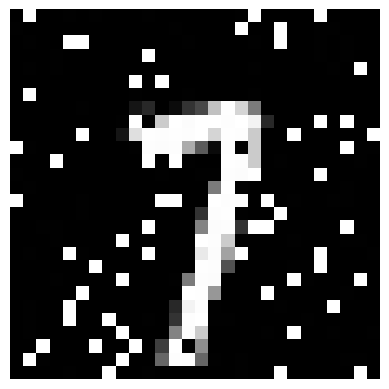

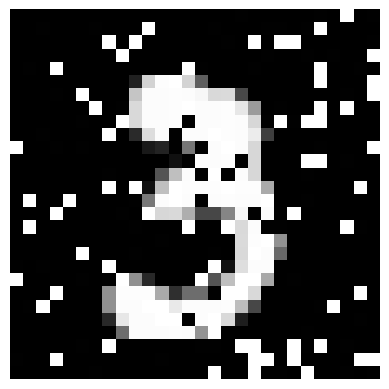

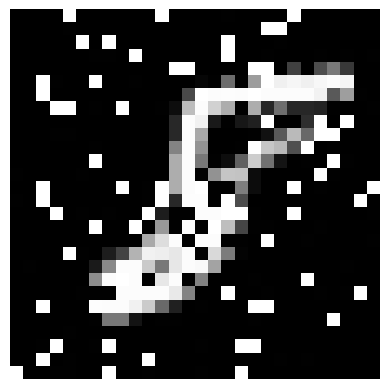

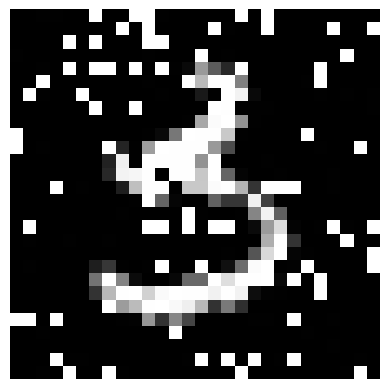

In [ ]:
import numpy as np

def add_noise(image, noise_rate):
    # Calculate the number of pixels to be modified
    num_pixels = int(noise_rate * image.size)

    # Generate random indices for the pixels to be modified
    indices = np.random.choice(image.size, num_pixels, replace=False)

    # Create a copy of the original image
    noisy_image = np.copy(image)

    # Add noise to the selected pixels
    noise = np.random.choice(choices, num_pixels)
    noisy_image.flat[indices] = noise

    return noisy_image

for i in range(LEARN_SAMPLE):
  noisy_image = add_noise(random_images[i], 0.2)
  plt.imshow(noisy_image, cmap = 'gray')
  plt.axis('off')
  plt.show()


[[0.         0.00510204 0.00510204 ... 0.00510204 0.00510204 0.00510204]
 [0.00510204 0.         0.00510204 ... 0.00510204 0.00510204 0.00510204]
 [0.00510204 0.00510204 0.         ... 0.00510204 0.00510204 0.00510204]
 ...
 [0.00510204 0.00510204 0.00510204 ... 0.         0.00510204 0.00510204]
 [0.00510204 0.00510204 0.00510204 ... 0.00510204 0.         0.00510204]
 [0.00510204 0.00510204 0.00510204 ... 0.00510204 0.00510204 0.        ]]
I am ok now after 1


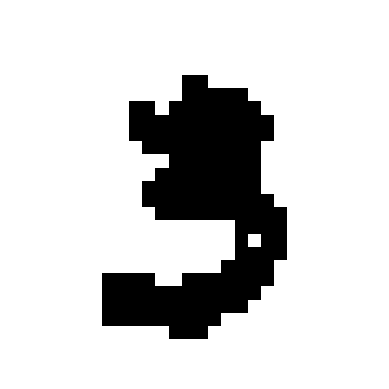

I am ok now after 1


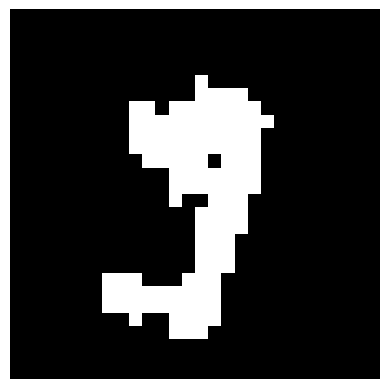

I am ok now after 1


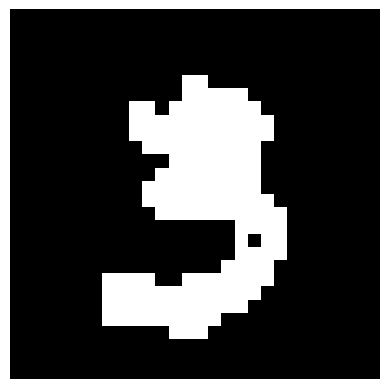

I am ok now after 2


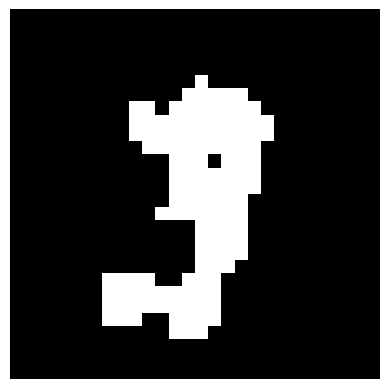

I am ok now after 2


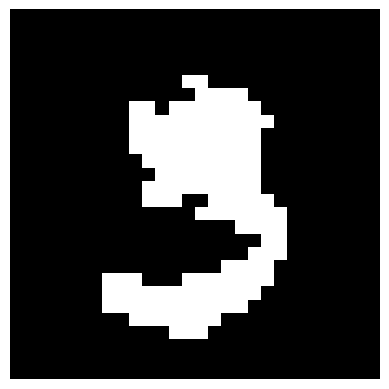

In [ ]:


class Hopfield:
  def __init__(self, n):
    self.n = n
    self.weight = np.zeros((n,n))
  
  # pattern must be of shape (n,)
  def learn(self, new_pattern, strength):
    pattern = np.reshape(new_pattern, (1,self.n))
    hezz = np.dot(pattern.T, pattern).astype(float)
    hezz *= (1.0 / self.n)
    np.fill_diagonal(hezz, 0.0)
    self.weight += strength * hezz
    
  # input must be of shape (n,)
  def recover(self, poor_memory, max_round):
    # (n,)
    work = poor_memory.copy()
    for round in range(max_round):
      updated = 0
      for i in range(self.n):
        activation = np.dot(self.weight[i,:], work)
        if work[i] * activation < 0:
          updated += 1
        if activation < 0:
          work[i] = -1
        else:
          work[i] = 1
      if updated == 0:
        print(f"I am ok now after {round}")
        break

    return work

hf = Hopfield(X * Y)

# Learn the one-shot
for i in range(LEARN_SAMPLE):
  image = random_images[i]
  image = np.where(image != 0, 1, -1)
  image = np.reshape(image, (X*Y,))
  hf.learn(image, 1.0)

print(hf.weight)

# a random noise image
noise = np.random.choice(choices, size=(X*Y,))
recovered = hf.recover(noise, 5000)
recovered = np.where(recovered == -1, 0, 1)
recovered = np.reshape(recovered, (X, Y))
plt.imshow(recovered, cmap='gray')
plt.axis('off')
plt.show()


for i in range(LEARN_SAMPLE):
  image = random_images[i]
  image = np.where(image != 0, 1, -1)
  image = np.reshape(image, (X*Y,))
  noisy_image = add_noise(image, 0.05)
  denoise = hf.recover(noisy_image, 5000)
  denoise = np.where(denoise == -1, 0, 1)
  denoise = np.reshape(denoise, (X, Y))
  plt.imshow(denoise, cmap='gray')
  plt.axis('off')
  plt.show()